In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glob
import seaborn as sns
from PIL import Image



In [38]:
img = Image.open('B3P0X1.png')
img = np.array(img)
height = img.shape[0]
width = img.shape[1]

print(height, width)

196 158


In [3]:
img.shape

(196, 158, 3)

(0.0, 158.0, 0.0, 196.0)

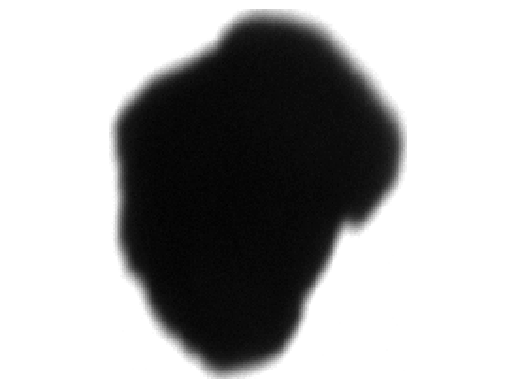

In [40]:
plt.pcolormesh(img[:,:,0], cmap='gray')
plt.axis('off')
plt.axis('equal')

In [41]:
img = img[:,:,0]
for n in range(0,img.shape[0]):
    for m in range(0,img.shape[1]):
        if img[n,m] > 173:
            img[n,m] = 0
        else:
            img[n,m] = 1

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

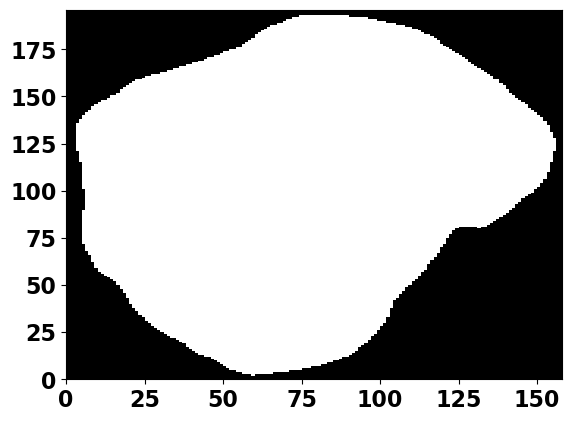

In [42]:
plt.pcolormesh(img, cmap='gray')

In [43]:
area = np.sum(img)
areaeq_diameter = 2*np.sqrt(area/np.pi)
print(areaeq_diameter, area)

158.82112145665107 19811


In [44]:
# Find the non-zero indices
nonzero_indices = np.nonzero(img)

# Calculate the centroid coordinates
centroid_x = np.mean(nonzero_indices[1])
centroid_y = np.mean(nonzero_indices[0])

# Print the centroid coordinates
print("Centroid coordinates: ({}, {})".format(centroid_x, centroid_y))


Centroid coordinates: (73.40856090050981, 102.61884811468376)


In [45]:
import numpy as np

# Calculate the distance from the centroid to each non-zero edge pixel
distances = np.sqrt((nonzero_indices[1] - centroid_x)**2 + (nonzero_indices[0] - centroid_y)**2)

# Print the distances
print(distances)



[101.64526169 101.12849693 100.96115971 ...  90.40861424  90.56434402
  90.73082875]


In [46]:
# Calculate the gradient of the image
gradient_x, gradient_y = np.gradient(img)

# Find the edge pixels
edge_pixels = np.sqrt(gradient_x**2 + gradient_y**2) > 0

# Print the edge pixels
print(edge_pixels)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

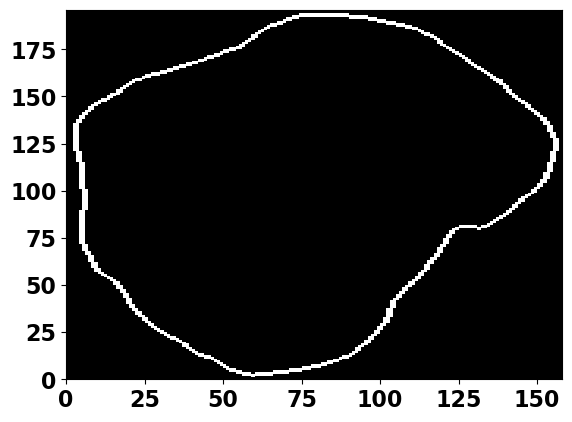

In [47]:
plt.pcolormesh(edge_pixels, cmap='gray')

In [48]:
distance = np.zeros((img.shape[0], img.shape[1]))
for n in range (0,img.shape[0]):
    for m in range (0,img.shape[1]):
        if edge_pixels[n,m] == True:
            distance[n,m] = np.sqrt((m - centroid_x)**2 + (n - centroid_y)**2)


In [21]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

(0.0, 158.0, 0.0, 196.0)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

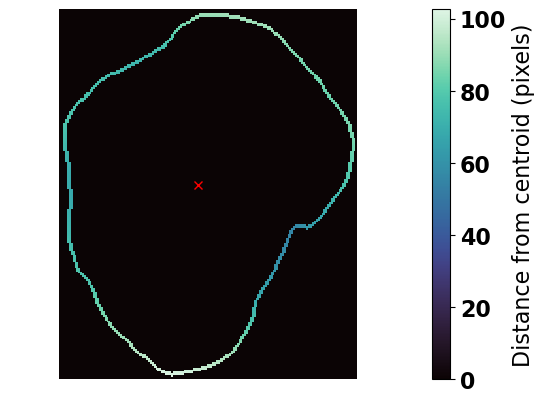

In [50]:
plt.pcolormesh(distance, cmap='mako')
plt.plot(centroid_x, centroid_y, 'rx')
plt.colorbar(label = 'Distance from centroid (pixels)')
plt.axis('off')
plt.axis('equal')

In [25]:
angles = np.array([])
distances = np.array([])
for n in range (0,img.shape[0]):
    for m in range (0,img.shape[1]):
        angle = np.arctan2(n - centroid_y, m - centroid_x)
        if distance[n,m] > 0:
            angles = np.append(angles, angle)
            distances = np.append(distances, distance[n,m])
            

In [26]:
np.sort(angles)

array([-3.13267687, -3.13254655, -3.11827342, -3.11793266, -3.10332888,
       -3.1027618 , -3.0887414 , -3.08795885, -3.07417641, -3.07317939,
       -3.05964   , -3.05842979, -3.04513822, -3.04371638, -3.03067701,
       -3.02904535, -3.01626224, -3.01442281, -3.00189963, -2.99985474,
       -2.98759479, -2.98534699, -2.9733532 , -2.97090524, -2.95918017,
       -2.95653502, -2.94784127, -2.94508086, -2.93400649, -2.93106025,
       -2.92025186, -2.91712315, -2.90658184, -2.90327418, -2.89300073,
       -2.88951777, -2.87951261, -2.87585814, -2.86612138, -2.86229933,
       -2.85283077, -2.84884515, -2.83964427, -2.83549919, -2.82656521,
       -2.82226487, -2.81359669, -2.80914536, -2.80074162, -2.79614363,
       -2.78800271, -2.78326244, -2.77538248, -2.77050433, -2.76288323,
       -2.75787164, -2.75050709, -2.7453665 , -2.73825597, -2.73299084,
       -2.72613162, -2.72074639, -2.7086347 , -2.70299968, -2.6966571 ,
       -2.69090966, -2.68481476, -2.67895946, -2.67310867, -2.66

In [28]:
plt.plot(sorted_angles, distances-areaeq_diameter/2)

NameError: name 'sorted_angles' is not defined

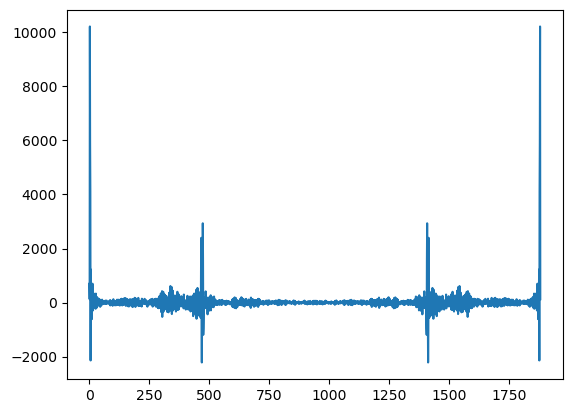

In [18]:
plt.plot(np.fft.hfft(distances-areaeq_diameter/2))
# plt.xlim(100, 800)
# plt.ylim(0, 1000)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

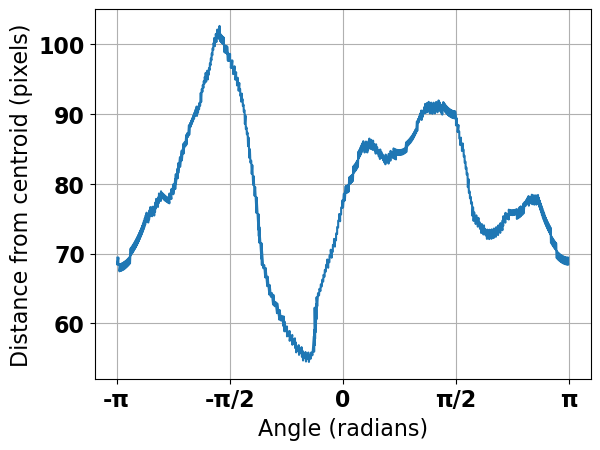

In [33]:
sorted_indices = np.argsort(angles)
sorted_angles = angles[sorted_indices]
sorted_distances = distances[sorted_indices]

plt.plot(sorted_angles, sorted_distances)
plt.xlabel('Angle (radians)')
plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
plt.ylabel('Distance from centroid (pixels)')
plt.grid()

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

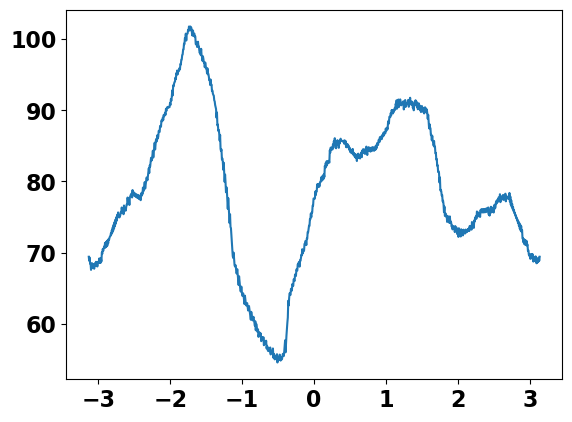

In [54]:
import scipy
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
cs = interp1d(sorted_angles, sorted_distances)
xs = np.linspace(sorted_angles[0], sorted_angles[-1], 1000)
plt.plot(xs, cs(xs))

/Users/langdonfeltner/mambaforge3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/langdonfeltner/mambaforge3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-600.0, 300.0)

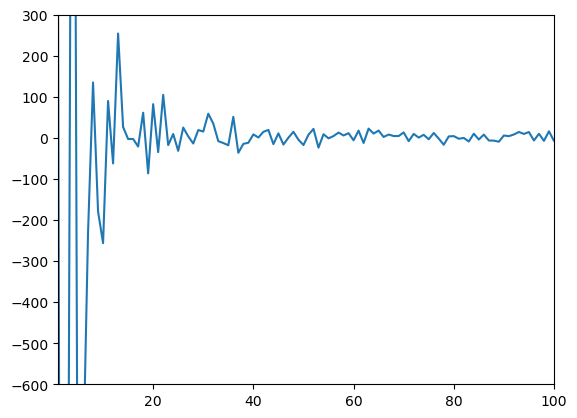

In [21]:
plt.plot(np.fft.fft(cs(xs)))
plt.xlim(1, 100)
plt.ylim(-600, 300)

In [22]:
scipy.signal.find_peaks(np.fft.fft(cs(xs)))

/Users/langdonfeltner/mambaforge3/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:266: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


(array([  4,   8,  11,  13,  16,  18,  20,  22,  24,  26,  29,  31,  36,
         40,  43,  45,  48,  52,  54,  57,  59,  61,  63,  65,  67,  70,
         72,  74,  76,  80,  82,  84,  86,  90,  93,  95,  97,  99, 102,
        104, 106, 108, 111, 116, 118, 120, 123, 127, 129, 132, 134, 138,
        140, 142, 145, 149, 153, 156, 159, 161, 166, 171, 174, 177, 181,
        185, 187, 189, 191, 194, 197, 200, 205, 207, 211, 213, 216, 219,
        221, 225, 228, 230, 234, 237, 239, 242, 246, 249, 252, 255, 258,
        260, 265, 267, 271, 274, 277, 281, 283, 285, 288, 291, 294, 297,
        302, 304, 307, 310, 315, 317, 319, 321, 324, 326, 328, 330, 333,
        336, 339, 341, 344, 348, 351, 355, 357, 361, 364, 368, 372, 374,
        378, 380, 384, 387, 391, 393, 395, 398, 400, 405, 408, 410, 412,
        416, 419, 423, 425, 427, 429, 431, 434, 437, 439, 441, 444, 450,
        453, 455, 457, 459, 462, 466, 468, 470, 472, 474, 478, 480, 482,
        486, 488, 490, 492, 494, 499, 501, 506, 508

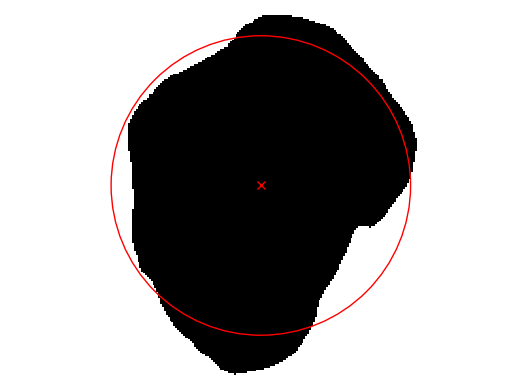

In [52]:
from matplotlib.patches import Circle
# plt.pcolormesh(img, cmap='gray')
import matplotlib.pyplot as plt
# Create a figure and axis
fig, ax = plt.subplots()

# Plot the image
ax.pcolormesh(img, cmap='gray_r')
ax.plot(centroid_x, centroid_y, 'rx')
# Create a circle patch
circle = Circle((centroid_x, centroid_y), areaeq_diameter/2, edgecolor='r', facecolor='none')
circle2 = Circle((centroid_x, centroid_y), 50, edgecolor='r', facecolor='none')
# Add the circle patch to the axis
ax.add_patch(circle)
ax.axis('off')
ax.axis('equal')
# ax.add_patch(circle2)
# Show the plot
plt.show()



In [65]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 11}

plt.rc('font', **font)

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

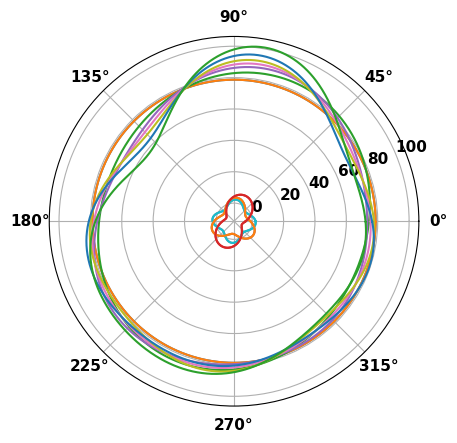

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

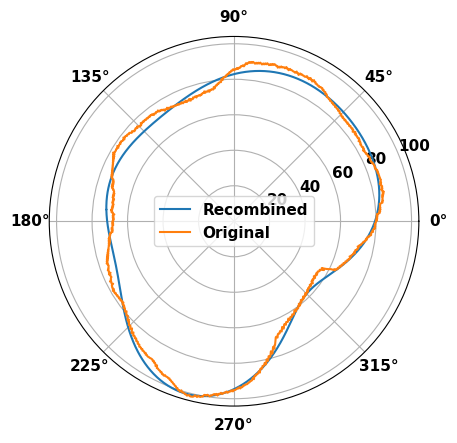

In [66]:
def decompose_fft(data: list, threshold: float = 0.0):
    fft3 = np.fft.fft(data)
    x = np.arange(0, 2*np.pi, 2*np.pi / len(data))
    freqs = np.fft.fftfreq(len(x), 2*np.pi / len(x))
    recomb = np.zeros((len(x),))
    for i in range(len(fft3)):
        if abs(fft3[i]) / len(x) > threshold:
            sinewave = (
                1 
                / len(x) 
                * (
                    fft3[i].real 
                    * np.cos(freqs[i] * 2 * np.pi * x) 
                    - fft3[i].imag 
                    * np.sin(freqs[i] * 2 * np.pi * x)))
            recomb += sinewave
            plt.polar(x,recomb)
            plt.polar(x, sinewave)  # Plotting on a polar graph
    plt.show()

    plt.polar(x+180-45, recomb, label='Recombined')  # Plotting on a polar graph
    plt.polar(x+180-45, data, label='Original')
    # plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.legend()  # Adding legend
    plt.show()
    return x, recomb
    

x, recomb =decompose_fft(cs(xs), 2)



findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

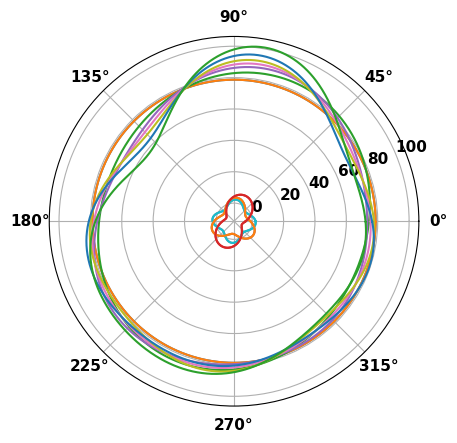

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

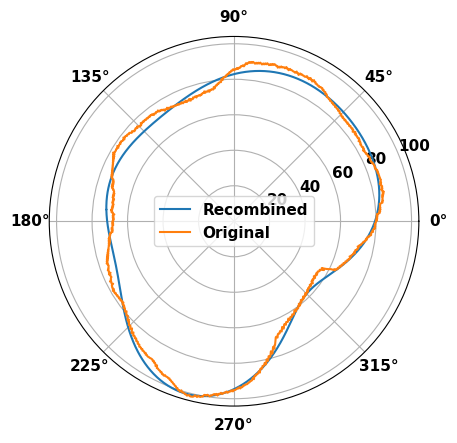

In [69]:
def decompose_fft(data: list, threshold: float = 0.0):
    fft3 = np.fft.fft(data)
    x = np.arange(0, 2*np.pi, 2*np.pi / len(data))
    freqs = np.fft.fftfreq(len(x), 2*np.pi / len(x))
    recomb = np.zeros((len(x),))
    for i in range(len(fft3)):
        if abs(fft3[i]) / len(x) > threshold:
            sinewave = (
                1 
                / len(x) 
                * (
                    fft3[i].real 
                    * np.cos(freqs[i] * 2 * np.pi * x) 
                    - fft3[i].imag 
                    * np.sin(freqs[i] * 2 * np.pi * x)))
            recomb += sinewave
            plt.polar(x,recomb)
            plt.polar(x, sinewave)  # Plotting on a polar graph
    plt.show()

    plt.polar(x+180-45, recomb, label='Recombined')  # Plotting on a polar graph
    plt.polar(x+180-45, data, label='Original')
    # plt.xticks(np.arange(-np.pi, np.pi+0.1, np.pi/2), ['-π', '-π/2', '0', 'π/2', 'π'])
    plt.legend()  # Adding legend
    plt.show()
    return x, recomb
    

x, recomb =decompose_fft(cs(xs), 2)



findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

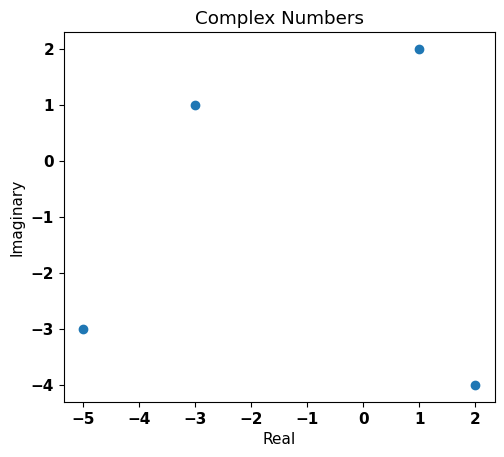

In [68]:
import matplotlib.pyplot as plt

# Create some complex numbers
complex_numbers = [1 + 2j, -3 + 1j, 2 - 4j, -5 - 3j]

# Extract the real and imaginary parts
real_parts = [z.real for z in complex_numbers]
imaginary_parts = [z.imag for z in complex_numbers]

# Create the plot
fig, ax = plt.subplots()
ax.scatter(real_parts, imaginary_parts)

# Set labels and title
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
ax.set_title('Complex Numbers')

# Set aspect ratio to equal
ax.set_aspect('equal')

# Show the plot
plt.show()


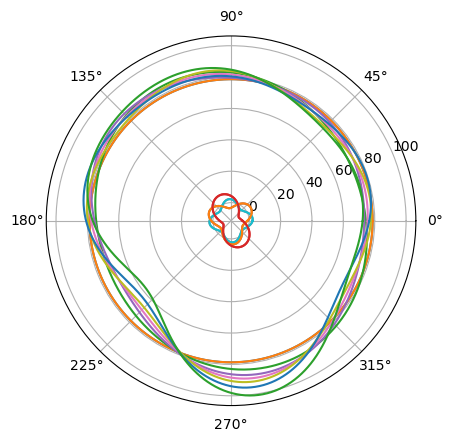

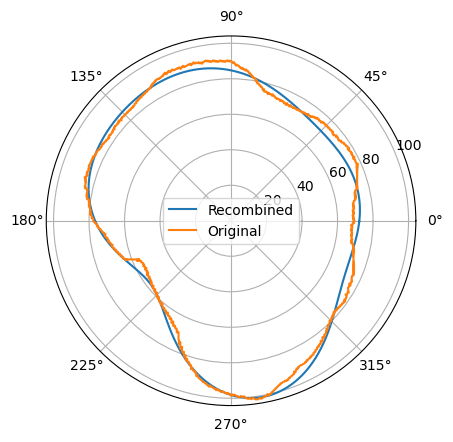

In [34]:
x2, recomb2 = decompose_fft(np.flip(cs(xs)), 2)

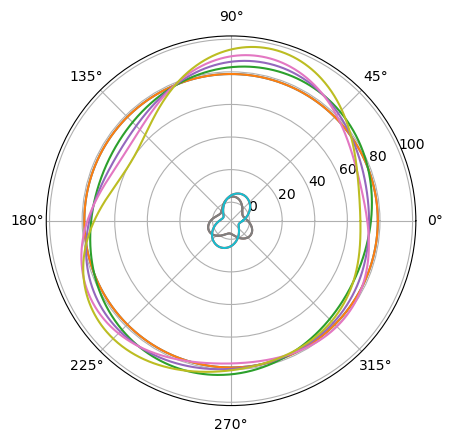

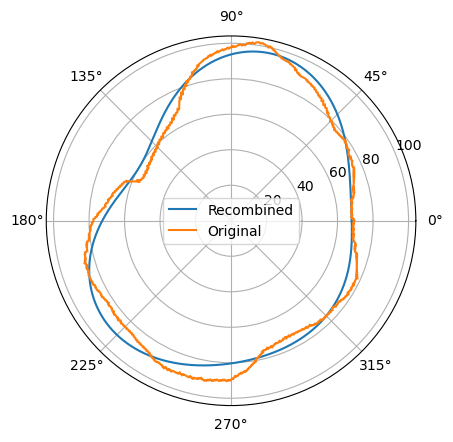

Area: 493.85539468629196
Perimeter: 120.38807927026656
Form Factor: 0.42819608783076185


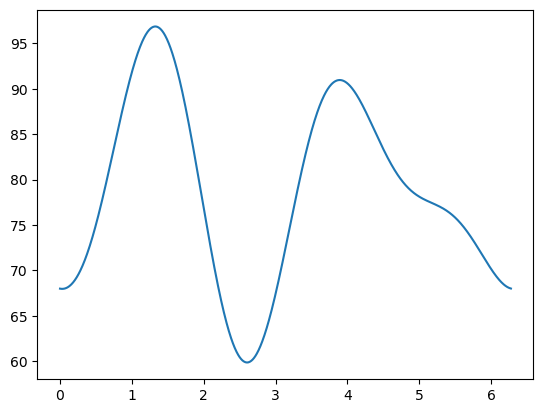

In [26]:
import numpy as np
x, particle = decompose_fft(cs(xs), 3)
plt.plot(x,particle)
def calculate_area_perimeter(r, theta):
    # Calculate the area using the trapezoidal rule
    area = np.trapz(y=r, x=theta)

    # Calculate the perimeter using the arc length formula
    perimeter = np.trapz(np.sqrt(1+np.gradient(r, theta)**2),theta)

    return area, perimeter

# Example usage:
area, perimeter = calculate_area_perimeter(particle,x)
print("Area:", area)
print("Perimeter:", perimeter)

print("Form Factor:", 4*np.pi*area/perimeter**2)


In [27]:
perimeter = np.trapz(np.sqrt(1+np.gradient(particle, x)**2),x)

In [28]:
4*np.pi*area/perimeter**2

0.42819608783076185

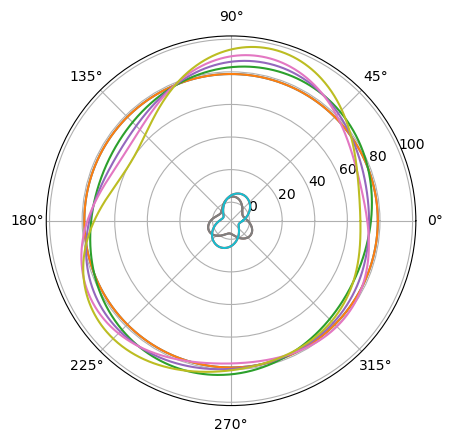

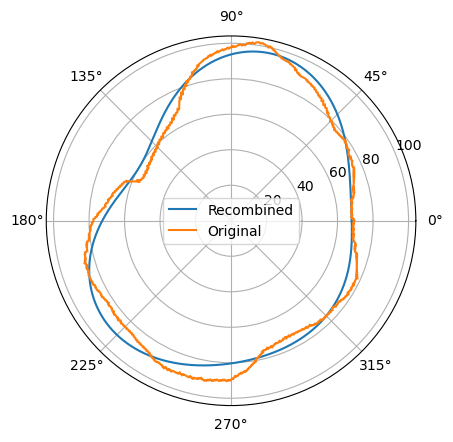

Tangent line equation: y = 35.03796388581486x + 57.23949253173316


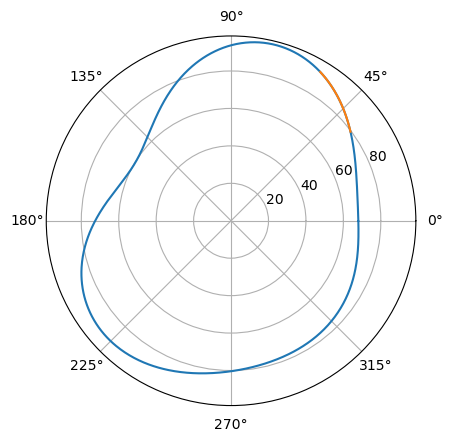

In [29]:
x, recomb = decompose_fft(cs(xs), 3)

# angle = np.random.uniform(0, 2*np.pi, 1)
D_guess = 0.2
force = 0.1

# recomb_value = np.interp(angle, x, recomb)


# need to convert this from angle to chord length->
x_within_range = x[(x >= angle - D_guess) & (x <= angle + D_guess)]
y_within_range = recomb[(x >= angle - D_guess) & (x <= angle + D_guess)]


# Calculate the interpolated value of recomb at x=angle
recomb_value = np.interp(angle, x_within_range, y_within_range)

# Calculate the derivative of recomb with respect to x
derivative = np.gradient(recomb, x)

# Find the index of the closest x value to angle
index = np.abs(x - angle).argmin()

# Calculate the slope of the tangent line
slope = derivative[index]

# Calculate the y-intercept of the tangent line
intercept = recomb_value - slope * angle

# Calculate the tangent line
tangent_line = slope * x + intercept

# Plot the polar graph with the tangent line
plt.polar(x, recomb)
plt.polar(x_within_range, y_within_range)
# plt.plot(x, tangent_line, 'r--')

# Print the tangent line equation
print("Tangent line equation: y = {}x + {}".format(slope, intercept))




# plt.polar(x, recomb)
# plt.polar(x_within_range, y_within_range)

# print(y_within_range, x_within_range)

63.99897654897902


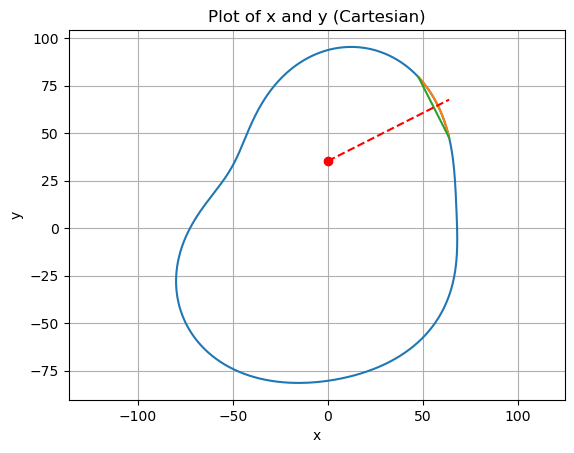

In [30]:
x_cartesian = recomb * np.cos(x)
y_cartesian = recomb * np.sin(x)
x_within_range_cartesian = y_within_range * np.cos(x_within_range)
y_within_range_cartesian = y_within_range * np.sin(x_within_range)

plt.plot(x_cartesian, y_cartesian)

plt.plot(x_within_range_cartesian, y_within_range_cartesian)

plt.plot(np.array([x_within_range_cartesian[0],x_within_range_cartesian[-1]]),np.array([y_within_range_cartesian[0],y_within_range_cartesian[-1]]))


plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x and y (Cartesian)')
plt.axis('equal')
plt.grid(True)
# plt.show()

a = np.array([x_within_range_cartesian[0],y_within_range_cartesian[0]])
b = np.array([x_within_range_cartesian[-1],y_within_range_cartesian[-1]])

d_init = np.linalg.norm(a-b)
d_init

# Calculate the midpoint of the chord AB
midpoint = (a + b) / 2

# Calculate the slope of the chord AB
slope_ab = (b[1] - a[1]) / (b[0] - a[0])

# Calculate the slope of the perpendicular line
slope_perpendicular = -1 / slope_ab

# Calculate the y-intercept of the perpendicular line
y_intercept = midpoint[1] - slope_perpendicular * midpoint[0]

# Define a range of x-values for the line
x_range = np.linspace(0, x_within_range_cartesian[0], 100)

# Calculate the corresponding y-values using the equation of the perpendicular line
y_range = slope_perpendicular * x_range + y_intercept

# Plot the perpendicular line on the Cartesian coordinate system
plt.plot(x_range, y_range, 'r--')




# Calculate the distances from each point on x_within_range_cartesian, y_within_range_cartesian to each point on x_range, y_range
distances = np.sqrt((x_within_range_cartesian[:, np.newaxis] - x_range)**2 + (y_within_range_cartesian[:, np.newaxis] - y_range)**2)

# Calculate the average distance for each point on x_range, y_range
average_distances = np.std(distances, axis=0)

# Find the index of the point with the minimum average distance
min_distance_index = np.argmin(average_distances)

# Get the coordinates of the point with the minimum average distance
equidistant_point = (x_range[min_distance_index], y_range[min_distance_index])

plt.plot(equidistant_point[0], equidistant_point[1], 'ro')

center = np.mean(np.array([x_within_range_cartesian, y_within_range_cartesian]), axis=1)

distance = np.sqrt((equidistant_point[0] - center[0])**2 + (equidistant_point[1] - center[1])**2)

print(distance)














In [31]:
width = 5*np.pi/180
lower_idx = np.where((x > width)&(x+width < 2*np.pi))
lower_idx[0][-1]

986

FileNotFoundError: [Errno 2] No such file or directory: '/Users/langdonfeltner/projects_sandbox/ParticlePy/ParticlePy/roc_images/roc_14.png'

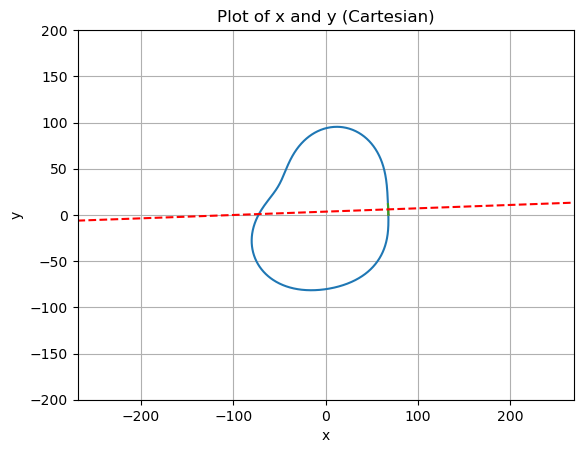

In [32]:
def roc_dist(x, recomb, width):
    radii = np.zeros((len(x),1))
    x_cartesian = recomb * np.cos(x)
    y_cartesian = recomb * np.sin(x)
    idx = np.where((x > width)&(x+width < 2*np.pi))
    for t in range (idx[0][0],idx[0][-1]):

        x_within_range = x[(x >= x[t] - width) & (x <= x[t] + width)]
        y_within_range = recomb[(x >= x[t] - width) & (x <= x[t] + width)]
        
        x_within_range_cartesian = y_within_range * np.cos(x_within_range)
        y_within_range_cartesian = y_within_range * np.sin(x_within_range)
        # print(t, y_within_range)

        a = np.array([x_within_range_cartesian[0],y_within_range_cartesian[0]])
        b = np.array([x_within_range_cartesian[-1],y_within_range_cartesian[-1]])

        d_init = np.linalg.norm(a-b)

        # Calculate the midpoint of the chord AB
        midpoint = (a + b) / 2

        # Calculate the slope of the chord AB
        slope_ab = (b[1] - a[1]) / (b[0] - a[0])

        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_ab

        # Calculate the y-intercept of the perpendicular line
        y_intercept = midpoint[1] - slope_perpendicular * midpoint[0]

        # Define a range of x-values for the line
        x_range = np.linspace(-1000, 1000, 10000)

        # Calculate the corresponding y-values using the equation of the perpendicular line
        y_range = slope_perpendicular * x_range + y_intercept





        # Calculate the distances from each point on x_within_range_cartesian, y_within_range_cartesian to each point on x_range, y_range
        distances = np.sqrt((x_within_range_cartesian[:, np.newaxis] - x_range)**2 + (y_within_range_cartesian[:, np.newaxis] - y_range)**2)

        # Calculate the average distance for each point on x_range, y_range
        average_distances = np.std(distances, axis=0)

        # Find the index of the point with the minimum average distance
        min_distance_index = np.argmin(average_distances)

        # Get the coordinates of the point with the minimum average distance
        equidistant_point = (x_range[min_distance_index], y_range[min_distance_index])

        center = np.mean(np.array([x_within_range_cartesian, y_within_range_cartesian]), axis=1)

        distance = np.sqrt((equidistant_point[0] - center[0])**2 + (equidistant_point[1] - center[1])**2)
        
        radii[t] = distance
        
        plt.close()
        plt.plot(x_cartesian, y_cartesian)

        plt.plot(x_within_range_cartesian, y_within_range_cartesian)

        plt.plot(np.array([x_within_range_cartesian[0],x_within_range_cartesian[-1]]),np.array([y_within_range_cartesian[0],y_within_range_cartesian[-1]]))

        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Plot of x and y (Cartesian)')
        plt.axis('equal')
        plt.grid(True)
        plt.plot(x_range, y_range, 'r--')
        plt.plot(equidistant_point[0], equidistant_point[1], 'ro')
        plt.xlim(-200, 200)
        plt.ylim(-200, 200)

        plt.savefig('roc_images/roc_{}.png'.format(t))


        

    return radii

# plt.hist(roc_dist(x, recomb, width), bins=50)
# plt.xlim(15, 120)
# plt.xlabel('Radius of Curvature')
# plt.ylabel('Frequency')


roc_dist(x, recomb, width)
        

    
    

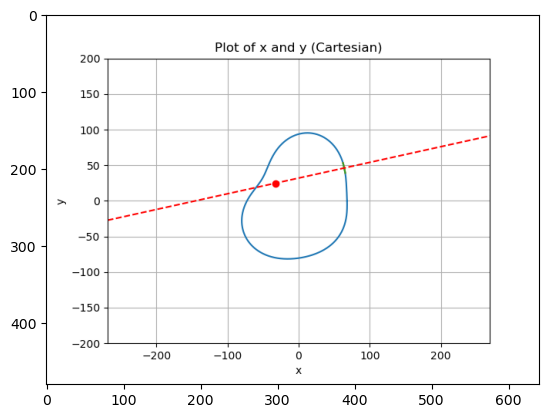

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation

img = [] # some array of images
filelist2 = glob.glob('roc_images/*.png') # Get all the pngs in the current directory
for filename in sorted(filelist2): #assuming gif
    im=Image.open(filename)
    img.append(im)
frames = [] # for storing the generated images
fig = plt.figure()
for i in range(len(img)):
    frames.append([plt.imshow(img[i],animated=True)])

ani = animation.ArtistAnimation(fig, frames, interval=50, blit=True,
                                repeat_delay=1000)
ani.save('ROC.mp4')
plt.show()

In [ ]:
E1 = 210000
E2 = 210000
v1 = 0.3
v2 = 0.3
R1 = 10*distance
F=10000
a = (3*F*(((1-(v1**2))/E1)+((1-(v2**2))/E2))/(4/R1))**(1/3)

print(R1, 2*a,d_init)

639.9897654897902 6.929875902809615 35.71735193642625


In [ ]:
def roc_dist_plot(x, recomb, width):
    radii = np.zeros((len(x),1))
    x_cartesian = recomb * np.cos(x)
    y_cartesian = recomb * np.sin(x)
    idx = np.where((x > width)&(x+width < 2*np.pi))
    for t in range (idx[0][0],idx[0][-1]):

        x_within_range = x[(x >= x[t] - width) & (x <= x[t] + width)]
        y_within_range = recomb[(x >= x[t] - width) & (x <= x[t] + width)]
        
        x_within_range_cartesian = y_within_range * np.cos(x_within_range)
        y_within_range_cartesian = y_within_range * np.sin(x_within_range)
        # print(t, y_within_range)

        a = np.array([x_within_range_cartesian[0],y_within_range_cartesian[0]])
        b = np.array([x_within_range_cartesian[-1],y_within_range_cartesian[-1]])

        d_init = np.linalg.norm(a-b)

        # Calculate the midpoint of the chord AB
        midpoint = (a + b) / 2

        # Calculate the slope of the chord AB
        slope_ab = (b[1] - a[1]) / (b[0] - a[0])

        # Calculate the slope of the perpendicular line
        slope_perpendicular = -1 / slope_ab

        # Calculate the y-intercept of the perpendicular line
        y_intercept = midpoint[1] - slope_perpendicular * midpoint[0]

        # Define a range of x-values for the line
        x_range = np.linspace(0, x_within_range_cartesian[0], 100)

        # Calculate the corresponding y-values using the equation of the perpendicular line
        y_range = slope_perpendicular * x_range + y_intercept





        # Calculate the distances from each point on x_within_range_cartesian, y_within_range_cartesian to each point on x_range, y_range
        distances = np.sqrt((x_within_range_cartesian[:, np.newaxis] - x_range)**2 + (y_within_range_cartesian[:, np.newaxis] - y_range)**2)

        # Calculate the average distance for each point on x_range, y_range
        average_distances = np.std(distances, axis=0)

        # Find the index of the point with the minimum average distance
        min_distance_index = np.argmin(average_distances)

        # Get the coordinates of the point with the minimum average distance
        equidistant_point = (x_range[min_distance_index], y_range[min_distance_index])

        center = np.mean(np.array([x_within_range_cartesian, y_within_range_cartesian]), axis=1)

        distance = np.sqrt((equidistant_point[0] - center[0])**2 + (equidistant_point[1] - center[1])**2)
        
        radii[t] = distance

        plt.close()

    return radii

# plt.hist(roc_dist(x, recomb, width), bins=50)
# plt.xlim(15, 120)
# plt.xlabel('Radius of Curvature')
# plt.ylabel('Frequency')



        

    
    